##Carga de librerías

In [14]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [15]:
import pandas as pd
import os
import numpy as np

##Carga de base de datos principal para moleculas  (molecule)


In [16]:
#Comma separated value text file containing
#information on molecules used for HOMO-LUMO GP calibration

data5 = pd.read_csv('../db/mmc5.csv')
data5.head()



,key,smiles,HOMO_exp,LUMO_exp,HOMO_calc,LUMO_calc
0,c7,CN(C1=O)C(C2C=C(OC)C3=C(C2=C1C=C4)C4=C5C6=C3C=...,-5.48,-3.84,-5.506927,-3.057544
1,c9,O=C(C1=C2C3=C(C=CC24)C5=C(C6=C7C=C5)C(CC=C6C(N...,-5.71,-3.71,-5.654385,-3.066683
2,c10,O=C(C1=C2C3=C(C(C(C=C4C(N(C(C)C)C5=O)=O)C6=C7C...,-5.94,-3.84,-5.716410,-3.307659
3,c14,O=C(C1=C2C(C(C3=C4C(C5C6=C7C=CC(C(N(C(C)C)C8=O...,-5.81,-3.61,-5.770852,-3.071316
4,d1,O=C1C(C2=C(C3=CC=C(S3)C4=CC=C(C(F)(F)F)C=C4)N1...,-5.26,-3.52,-5.280874,-3.223849


In [17]:
#Machine Learning

In [18]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   key        94 non-null     object 
 1   smiles     94 non-null     object 
 2   HOMO_exp   94 non-null     float64
 3   LUMO_exp   94 non-null     float64
 4   HOMO_calc  94 non-null     float64
 5   LUMO_calc  94 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.5+ KB


<AxesSubplot:>

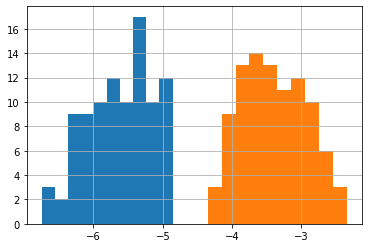

In [19]:
data5['HOMO_exp'].hist()
data5['LUMO_exp'].hist()

<AxesSubplot:>

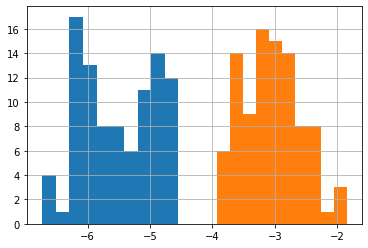

In [20]:
data5['HOMO_calc'].hist()
data5['LUMO_calc'].hist()

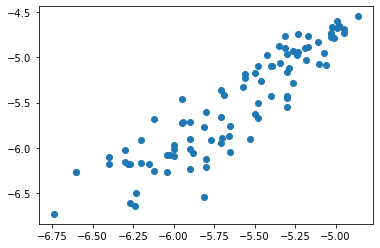

In [21]:
plt.scatter(data5['HOMO_exp'], data5['HOMO_calc'])

##gaussian Process

scores: [-1.15657712  0.11714544  0.5608637   0.44767385  0.21889026]
-51.45123884742225
3.428070800032632


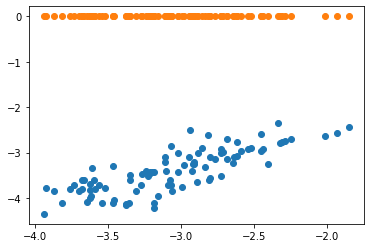

In [22]:
X = data5['LUMO_calc']
y = data5['LUMO_exp']

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score



gpr = GaussianProcessRegressor()


X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)


print(f'scores: {cross_val_score(gpr, X_val, y_val, cv=5)}')

  


predict = gpr.predict(X_val)

plt.scatter(X, y)
print(gpr.score(X_val, y_val))
print(mean_squared_error(y_val, predict)**(1/2))
plt.scatter(X_val, predict)


plt.show()

0.8491609886462796
0.1767655605326515


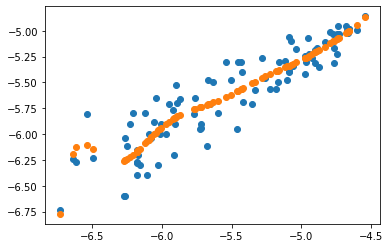

In [23]:
X = data5['HOMO_calc']
y = data5['HOMO_exp']

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import KFold

gpr = GaussianProcessRegressor()


X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)

kf = KFold(n_splits=32, shuffle=True, random_state=25)
homo_df = pd.concat([X, y], axis=1, sort=False)

for train_index, test_index in kf.split(homo_df):
    X_train = np.array(homo_df.iloc[train_index]['HOMO_calc']).reshape(-1, 1)
    X_test = np.array(homo_df.iloc[test_index]['HOMO_calc']).reshape(-1, 1)
    y_train = np.array(homo_df.iloc[train_index]['HOMO_exp']).reshape(-1, 1)
    y_test = np.array(homo_df.loc[test_index]['HOMO_exp']).reshape(-1, 1)
    #Train the model
    gpr.fit(X_train, y_train) #Training the model

predict = gpr.predict(X_val)

plt.scatter(X, y)
print(gpr.score(X_val, y_val))
print(mean_squared_error(y_val, predict)**(1/2))
plt.scatter(X_val, predict)


plt.show()

In [24]:
homo_exp_andres = pd.DataFrame(predict, columns=['HOMO_cal_projecto'])
homo_exp = pd.DataFrame(y, columns=['HOMO_exp'])

In [25]:
homo_data =  pd.concat([homo_exp_andres, homo_exp], axis=1, sort=False)
homo_data

,HOMO_cal_projecto,HOMO_exp
0,-5.620133,-5.480000
1,-5.706546,-5.710000
2,-5.735388,-5.940000
3,-5.760124,-5.810000
4,-5.457854,-5.260000
...,...,...
89,-6.143156,-6.300093
90,-6.258595,-6.600097
91,-5.693955,-5.500081
92,-6.255842,-6.600097


0.8491932157359092
0.1624197395494662


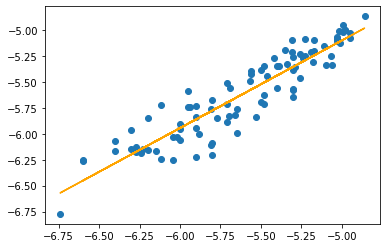

In [26]:
from sklearn.linear_model import LinearRegression
y = homo_exp_andres
X = homo_exp

reg = LinearRegression().fit(X, y)
predict = reg.predict(X)
print(reg.score(X, y))
print(mean_squared_error(y, predict)**(1/2))

plt.scatter(X,y)
plt.plot(X,predict, color='orange')
plt.show()

##KNN

[-0.09420808  0.41497148]
0.36992555778386793
0.4027261276097406


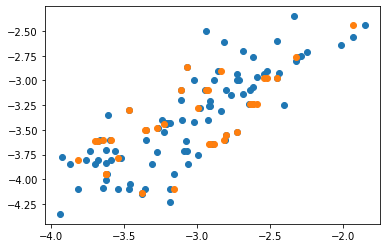

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = np.array(data5['LUMO_calc']).reshape(-1,1)
y = np.array(data5['LUMO_exp']).reshape(-1,1)
  
scaler = Normalizer()
scaler1= StandardScaler()
knn = KNeighborsRegressor(n_neighbors=1, weights='distance')
pipeline = make_pipeline(scaler1, knn)

X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
pipeline.fit(X_train, y_train)
print(cross_val_score(pipeline, X_train, y_train, cv=2))

predict = pipeline.predict(X_test)

plt.scatter(X, y)
print(pipeline.score(X_test, y_test))
print(mean_squared_error(y_test, predict)**(1/2))
plt.scatter(X_test, predict)


plt.show()